In [20]:
# !pip install nfl_data_py
# !pip install pandas
# !pip install matplotlib
# !pip install pillow

Basics for a tutorial in EPA:

In [2]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image

In [3]:
pbp = nfl.import_pbp_data([2021, 2022, 2023])

2021 done.
2022 done.
2023 done.
Downcasting floats.


In [4]:
offense = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
offense = offense.dropna(subset = ['epa', 'posteam', 'defteam'])
offense.shape

(111233, 390)

In [5]:
pass_epa = offense[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = { 'epa' : 'pass_epa' })
pass_epa.sort_values('pass_epa', ascending  = False)

/var/folders/rn/0thfrjj9331_r1tcvd8tkbfc0000gn/T/ipykernel_22151/231016200.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = offense[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = { 'epa' : 'pass_epa' })


,posteam,pass_epa
28,SF,0.207077
15,KC,0.206974
3,BUF,0.177383
8,DAL,0.155193
11,GB,0.144420
6,CIN,0.117339
29,TB,0.109580
25,PHI,0.101222
10,DET,0.095800
16,LA,0.087869


In [6]:
rush_epa = offense[(offense['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = { 'epa' : 'rush_epa' })
rush_epa.sort_values('rush_epa', ascending  = False)
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa 

,posteam,pass_epa,rush_epa
0,ARI,-0.016701,-0.042838
1,ATL,-0.018861,-0.101245
2,BAL,0.043843,-0.002115
3,BUF,0.177383,-0.009464
4,CAR,-0.131491,-0.079517
5,CHI,-0.069344,-0.047777
6,CIN,0.117339,-0.085950
7,CLE,-0.044510,-0.033899
8,DAL,0.155193,-0.045732
9,DEN,0.012236,-0.107365


In [7]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []

if not os.path.exists('logos'):
    os.makedirs('logos')

for team in range( len(logos)):
    logo_url = logos['team_logo_espn'][team]
    logo_path = f"logos/{logos['team_abbr'][team]}.png"
    urllib.request.urlretrieve(logo_url, logo_path)
    
    # Resize the logo to a fixed size
    img = Image.open(logo_path)
    img = img.resize((50, 50), Image.LANCZOS)  # Resize to 50x50 pixels
    img.save(logo_path)
    
    logo_paths.append(logo_path)
    team_abbr.append(logos['team_abbr'][team])

logo_data = pd.DataFrame({'team_abbr': team_abbr, 'logo_path': logo_paths})

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

epa_with_logos

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.016701,-0.042838,ARI,logos/ARI.png
1,ATL,-0.018861,-0.101245,ATL,logos/ATL.png
2,BAL,0.043843,-0.002115,BAL,logos/BAL.png
3,BUF,0.177383,-0.009464,BUF,logos/BUF.png
4,CAR,-0.131491,-0.079517,CAR,logos/CAR.png
5,CHI,-0.069344,-0.047777,CHI,logos/CHI.png
6,CIN,0.117339,-0.085950,CIN,logos/CIN.png
7,CLE,-0.044510,-0.033899,CLE,logos/CLE.png
8,DAL,0.155193,-0.045732,DAL,logos/DAL.png
9,DEN,0.012236,-0.107365,DEN,logos/DEN.png


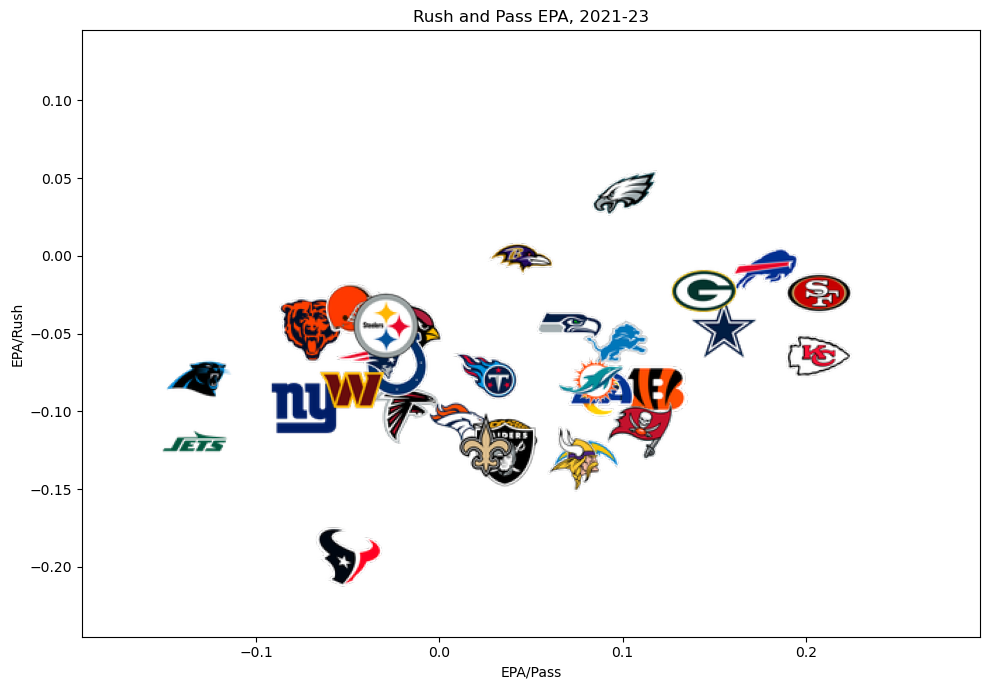

In [23]:
plt.rcParams["figure.figsize"] = [10,7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format = 'tif'), zoom = 1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

plt.xlim(-0.195, 0.295)
plt.ylim(-0.245, 0.145)
plt.title("Rush and Pass EPA, 2021-23")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()